In [17]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.mllib import linalg
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor

In [18]:
spark = SparkSession.builder.appName('app').getOrCreate()

In [19]:
# bu şekilde veri okunabilir. 1.yol diyebiliriz.
# There are many ways to read csv,xlsx,etc. file. One of them is like this:
df = spark.read.csv('Advertising.csv')

In [20]:
df.show()
# It is equal to pandas head() function.
# .show() pandas kütüphanesinde .head() ile eşdeğerdir.

+----+-----+-----+---------+-----+
| _c0|  _c1|  _c2|      _c3|  _c4|
+----+-----+-----+---------+-----+
|null|   TV|radio|newspaper|sales|
|   1|230.1| 37.8|     69.2| 22.1|
|   2| 44.5| 39.3|     45.1| 10.4|
|   3| 17.2| 45.9|     69.3|  9.3|
|   4|151.5| 41.3|     58.5| 18.5|
|   5|180.8| 10.8|     58.4| 12.9|
|   6|  8.7| 48.9|       75|  7.2|
|   7| 57.5| 32.8|     23.5| 11.8|
|   8|120.2| 19.6|     11.6| 13.2|
|   9|  8.6|  2.1|        1|  4.8|
|  10|199.8|  2.6|     21.2| 10.6|
|  11| 66.1|  5.8|     24.2|  8.6|
|  12|214.7|   24|        4| 17.4|
|  13| 23.8| 35.1|     65.9|  9.2|
|  14| 97.5|  7.6|      7.2|  9.7|
|  15|204.1| 32.9|       46|   19|
|  16|195.4| 47.7|     52.9| 22.4|
|  17| 67.8| 36.6|      114| 12.5|
|  18|281.4| 39.6|     55.8| 24.4|
|  19| 69.2| 20.5|     18.3| 11.3|
+----+-----+-----+---------+-----+
only showing top 20 rows



In [21]:
# bu şekilde de veri okunabilir. Kısaca 2.yol diyebiliriz.
# This is a second way to read csv,xlsx,etc.
dataframe = spark.read \
    .options(header=True, inferSchema=True) \
    .csv("Advertising.csv")

In [22]:
dataframe.show()

+---+-----+-----+---------+-----+
|_c0|   TV|radio|newspaper|sales|
+---+-----+-----+---------+-----+
|  1|230.1| 37.8|     69.2| 22.1|
|  2| 44.5| 39.3|     45.1| 10.4|
|  3| 17.2| 45.9|     69.3|  9.3|
|  4|151.5| 41.3|     58.5| 18.5|
|  5|180.8| 10.8|     58.4| 12.9|
|  6|  8.7| 48.9|     75.0|  7.2|
|  7| 57.5| 32.8|     23.5| 11.8|
|  8|120.2| 19.6|     11.6| 13.2|
|  9|  8.6|  2.1|      1.0|  4.8|
| 10|199.8|  2.6|     21.2| 10.6|
| 11| 66.1|  5.8|     24.2|  8.6|
| 12|214.7| 24.0|      4.0| 17.4|
| 13| 23.8| 35.1|     65.9|  9.2|
| 14| 97.5|  7.6|      7.2|  9.7|
| 15|204.1| 32.9|     46.0| 19.0|
| 16|195.4| 47.7|     52.9| 22.4|
| 17| 67.8| 36.6|    114.0| 12.5|
| 18|281.4| 39.6|     55.8| 24.4|
| 19| 69.2| 20.5|     18.3| 11.3|
| 20|147.3| 23.9|     19.1| 14.6|
+---+-----+-----+---------+-----+
only showing top 20 rows



In [23]:
type(dataframe)

pyspark.sql.dataframe.DataFrame

In [24]:
# kolon isimlerini bu şekilde değiştirip gözlemleyebilirsiniz.
# TV olarak kolon ismi verdim çünkü alt tarafta kolon isimlerini değiştirmeyi gösterdim.

# This code, it can change column names.
# If you've 5 columns like in dataframe, you can rename columns that you will work.
df = dataframe.toDF('SıraNo','TV','Radio','Newspaper','Sales')

In [25]:
# burada da kasti olarak TV olan kolon adını nasıl değiştirilebileceğini göstermek istedim.
# Here, I want to show how you can change only 1 column name with pyspark.
df = df.withColumnRenamed('TV','Tv')

In [26]:
df.show()

+------+-----+-----+---------+-----+
|SıraNo|   Tv|Radio|Newspaper|Sales|
+------+-----+-----+---------+-----+
|     1|230.1| 37.8|     69.2| 22.1|
|     2| 44.5| 39.3|     45.1| 10.4|
|     3| 17.2| 45.9|     69.3|  9.3|
|     4|151.5| 41.3|     58.5| 18.5|
|     5|180.8| 10.8|     58.4| 12.9|
|     6|  8.7| 48.9|     75.0|  7.2|
|     7| 57.5| 32.8|     23.5| 11.8|
|     8|120.2| 19.6|     11.6| 13.2|
|     9|  8.6|  2.1|      1.0|  4.8|
|    10|199.8|  2.6|     21.2| 10.6|
|    11| 66.1|  5.8|     24.2|  8.6|
|    12|214.7| 24.0|      4.0| 17.4|
|    13| 23.8| 35.1|     65.9|  9.2|
|    14| 97.5|  7.6|      7.2|  9.7|
|    15|204.1| 32.9|     46.0| 19.0|
|    16|195.4| 47.7|     52.9| 22.4|
|    17| 67.8| 36.6|    114.0| 12.5|
|    18|281.4| 39.6|     55.8| 24.4|
|    19| 69.2| 20.5|     18.3| 11.3|
|    20|147.3| 23.9|     19.1| 14.6|
+------+-----+-----+---------+-----+
only showing top 20 rows



In [27]:
# sıra no olan kolon bizim işimize yaramadığı için o kolonu veriden dropluyoruz.
# I do not work with this column so I dropped.
df = df.drop('SıraNo')

In [28]:
# Görüldüğü gibi veri tipleri sayısal değerlere tekabül değil. Bunları float - integer hale dönüştürmemiz gerekiyor.
# Variables are not integer or float so I have to modify them.
df.dtypes

[('Tv', 'double'),
 ('Radio', 'double'),
 ('Newspaper', 'double'),
 ('Sales', 'double')]

In [31]:
from pyspark.sql.functions import col
# Burada her değer için float değerine dönüşüm yapıyoruz.
# That code I wrote here converts variables to float.You can see below.
df = df.select(*(col(c).cast('float').alias(c) for c in df.columns))

In [32]:
df.dtypes

[('Tv', 'float'),
 ('Radio', 'float'),
 ('Newspaper', 'float'),
 ('Sales', 'float')]

In [33]:
# tv değeri 20'den küçükken sales değeri 4'ten büyük ve 8'den küçük olduğu değerleri verir.
# Show values where Tv variable is greater than 20 and Sales variable is between 4-8.
df[(df.Tv <20) & (df.Sales >4) & (df.Sales <8)].show()

+----+-----+---------+-----+
|  Tv|Radio|Newspaper|Sales|
+----+-----+---------+-----+
| 8.7| 48.9|     75.0|  7.2|
| 8.6|  2.1|      1.0|  4.8|
|13.2| 15.9|     49.6|  5.6|
| 7.3| 28.1|     41.4|  5.5|
| 5.4| 29.9|      9.4|  5.3|
|13.1|  0.4|     25.6|  5.3|
|19.4| 16.0|     22.3|  6.6|
|18.8| 21.7|     50.4|  7.0|
| 7.8| 38.9|     50.6|  6.6|
| 8.4| 27.2|      2.1|  5.7|
|11.7| 36.9|     45.2|  7.3|
|19.6| 20.1|     17.0|  7.6|
|18.7| 12.1|     23.4|  6.7|
|17.2|  4.1|     31.6|  5.9|
+----+-----+---------+-----+



In [34]:
import pyspark.sql.functions as F
# Tv değişkenin logaritmasını alıp minimize ederek Tv_y değişkenine atadım.
# ben bu değeri veriye eklemiyorum çünkü tek amacım size bunun nasıl yapıldığını göstermekti.

# When you work with complex data and If you want to optimize and minimize, you can use logarithmic minimization.
df.withColumn('Tv_y', F.log(df.Tv)).show()

+-----+-----+---------+-----+------------------+
|   Tv|Radio|Newspaper|Sales|              Tv_y|
+-----+-----+---------+-----+------------------+
|230.1| 37.8|     69.2| 22.1| 5.438514023566811|
| 44.5| 39.3|     45.1| 10.4|3.7954891891721947|
| 17.2| 45.9|     69.3|  9.3| 2.844909428176351|
|151.5| 41.3|     58.5| 18.5| 5.020585624949424|
|180.8| 10.8|     58.4| 12.9| 5.197391464837267|
|  8.7| 48.9|     75.0|  7.2|2.1633230037369904|
| 57.5| 32.8|     23.5| 11.8| 4.051784947803305|
|120.2| 19.6|     11.6| 13.2| 4.789156996712107|
|  8.6|  2.1|      1.0|  4.8| 2.151762247616406|
|199.8|  2.6|     21.2| 10.6| 5.297316881488516|
| 66.1|  5.8|     24.2|  8.6| 4.191168723773239|
|214.7| 24.0|      4.0| 17.4|5.3692416906706795|
| 23.8| 35.1|     65.9|  9.2| 3.169685548621149|
| 97.5|  7.6|      7.2|  9.7| 4.579852378003801|
|204.1| 32.9|     46.0| 19.0| 5.318610099720334|
|195.4| 47.7|     52.9| 22.4| 5.275048708372676|
| 67.8| 36.6|    114.0| 12.5| 4.216562239957526|
|281.4| 39.6|     55

In [35]:
import pyspark.sql.functions as F
# TR - Burada yapılan işlem ise tamamen sınıflandırma sistemini temsil ediyor. 
# Customer segmentation yapanların işine yarayabileceğini düşündüğüm için ekledim. (kendi çalışacağım veriye eklemiyorum)
# Verideki Tv değişkeni 50'den büyük olduğu noktada 'Sınıflandırma' kolonuna 1 değeri ekleniyor.
# Tv değişkeni 50'den küçük ve Sales değişkeni 6'dan büyük ise 2 değerini 'Sınıflandırma' kolonuna ekliyor.
# Hem Tv değişkeni 50'den küçük hem de Sales değişkeni 6'dan küçük ise 3 değerini 'Sınıflandırma' kolonuna ekliyor.


# EN - I see 1, where the tv variable is greater than 50, in 'sınıflandırma column'
# I see 2, where the sales variable is greater than 6 in 'sınıflandırma column'
# I see 3, otherwise in 'sınıflandırma column'
df.withColumn('sınıflandırma', \
             F.when(df.Tv > 50, 1) \
              .when(df.Sales > 6,2) \
              .otherwise(3)).show()

+-----+-----+---------+-----+-------------+
|   Tv|Radio|Newspaper|Sales|sınıflandırma|
+-----+-----+---------+-----+-------------+
|230.1| 37.8|     69.2| 22.1|            1|
| 44.5| 39.3|     45.1| 10.4|            2|
| 17.2| 45.9|     69.3|  9.3|            2|
|151.5| 41.3|     58.5| 18.5|            1|
|180.8| 10.8|     58.4| 12.9|            1|
|  8.7| 48.9|     75.0|  7.2|            2|
| 57.5| 32.8|     23.5| 11.8|            1|
|120.2| 19.6|     11.6| 13.2|            1|
|  8.6|  2.1|      1.0|  4.8|            3|
|199.8|  2.6|     21.2| 10.6|            1|
| 66.1|  5.8|     24.2|  8.6|            1|
|214.7| 24.0|      4.0| 17.4|            1|
| 23.8| 35.1|     65.9|  9.2|            2|
| 97.5|  7.6|      7.2|  9.7|            1|
|204.1| 32.9|     46.0| 19.0|            1|
|195.4| 47.7|     52.9| 22.4|            1|
| 67.8| 36.6|    114.0| 12.5|            1|
|281.4| 39.6|     55.8| 24.4|            1|
| 69.2| 20.5|     18.3| 11.3|            1|
|147.3| 23.9|     19.1| 14.6|   

In [36]:
# Pandas kütüphanesinde olan istatistiksel bilgileri, pyspark aracılığıyla bu şekilde gözlemliyoruz.
# You may have statistical information about data.
df.describe().show()

+-------+------------------+------------------+-----------------+------------------+
|summary|                Tv|             Radio|        Newspaper|             Sales|
+-------+------------------+------------------+-----------------+------------------+
|  count|               200|               200|              200|               200|
|   mean|147.04250006765128| 23.26400001600385|30.55400006264448|14.022500011324883|
| stddev| 85.85423671753229|14.846809192026852|21.77862092152218|5.2174566034584675|
|    min|               0.7|               0.0|              0.3|               1.6|
|    max|             296.4|              49.6|            114.0|              27.0|
+-------+------------------+------------------+-----------------+------------------+



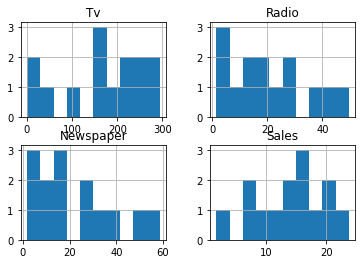

In [37]:
# Histogram grafiği. 
# Histogram graph.
df.sample(False, 0.1).toPandas().hist();

### ML 

In [38]:
# bağımlı değişken 'Sales' olduğu için onu drop edip bağımlı değişkene etki eden featureları alıyorum
# My dependent variable is 'Sales' so I'll take other variables.
features = df.drop('Sales')

In [39]:
features.columns

['Tv', 'Radio', 'Newspaper']

In [40]:
from pyspark.ml.feature import VectorAssembler
# VectorAssembler, kendisine aldığı değişkenleri outputCol değişkenine vererek tüm değişkenleri kendi içine toplar.
# VectorAssembler keeps variable that I given.

In [41]:
assembler = VectorAssembler(inputCols = features.columns, outputCol = "features")

In [42]:
output  = assembler.transform(df)

In [43]:
output.show()

+-----+-----+---------+-----+--------------------+
|   Tv|Radio|Newspaper|Sales|            features|
+-----+-----+---------+-----+--------------------+
|230.1| 37.8|     69.2| 22.1|[230.100006103515...|
| 44.5| 39.3|     45.1| 10.4|[44.5,39.29999923...|
| 17.2| 45.9|     69.3|  9.3|[17.2000007629394...|
|151.5| 41.3|     58.5| 18.5|[151.5,41.2999992...|
|180.8| 10.8|     58.4| 12.9|[180.800003051757...|
|  8.7| 48.9|     75.0|  7.2|[8.69999980926513...|
| 57.5| 32.8|     23.5| 11.8|[57.5,32.79999923...|
|120.2| 19.6|     11.6| 13.2|[120.199996948242...|
|  8.6|  2.1|      1.0|  4.8|[8.60000038146972...|
|199.8|  2.6|     21.2| 10.6|[199.800003051757...|
| 66.1|  5.8|     24.2|  8.6|[66.0999984741211...|
|214.7| 24.0|      4.0| 17.4|[214.699996948242...|
| 23.8| 35.1|     65.9|  9.2|[23.7999992370605...|
| 97.5|  7.6|      7.2|  9.7|[97.5,7.599999904...|
|204.1| 32.9|     46.0| 19.0|[204.100006103515...|
|195.4| 47.7|     52.9| 22.4|[195.399993896484...|
| 67.8| 36.6|    114.0| 12.5|[6

In [44]:
# data değişkenine sadece ilgileneceğimiz değişkenleri, select ile sqlde olduğu gibi seçiyorum. 
# bağımsız değişkenlerin hepsini features altında VectorAssembler sayesinde almıştım.
# bağımlı değişken ise halihazırda 'Sales'

# I select only features and Sales variables to split test and train.
data  = output.select('features','Sales')

In [45]:
# burada random bir şekilde train test olarak ayırıyorum.
# It is similar to train_test_split
train_df,test_df = data.randomSplit([0.7,0.3])

#### Linear Regresyon 

In [46]:
# Regresyon problemi olduğu için kullandığım algoritmayı doğrusal regresyon olarak seçiyorum.
lin_reg = LinearRegression(featuresCol ='features', labelCol= 'Sales') 
linear_model = lin_reg.fit(train_df)

In [47]:
# Regresyon katsayıları 
# Coefficients of beta 0, b1,...,bn
coefficients =  linear_model.coefficients
print('b0 :', linear_model.intercept)
print('b1:', coefficients[0])
print('b2:', coefficients[1])
print('b3:', coefficients[2])

b0 : 2.6415212685329648
b1: 0.046964209452895284
b2: 0.18921813235352963
b3: -0.000934055815210228


 <bold> REGRESSION MODEL CALCULATION </bold>
 
 
#### y = b0 + b1x1 + b2x2 + ... + bnxn


In [48]:
# RMSE değerini bu şekilde alıyoruz.
# We can reach RMSE value in this way.
trainSummary = linear_model.summary
print("RMSE:", trainSummary.rootMeanSquaredError)

RMSE: 1.7354901650678352


In [49]:
# Prediction (Tahminleme)

In [50]:
# test_df ile tahminlenen değerleri predictions içine alıyorum.
# sonrasında predict edilen değer ile gerçek değeri karşılaştırabiliriz.

# prediction variable show the predicted values given by the model.
# you can compare prediction and sales values.
predictions = linear_model.transform(test_df)
predictions.select('prediction', 'Sales','features').show()

+------------------+-----+--------------------+
|        prediction|Sales|            features|
+------------------+-----+--------------------+
| 5.023680812324371|  3.2|[4.09999990463256...|
| 8.262719685637025|  5.5|[7.30000019073486...|
|3.4418374918252432|  4.8|[8.60000038146972...|
| 7.349425375353498|  7.6|[19.6000003814697...|
| 5.869284502319801|  7.2|[25.0,11.0,29.700...|
| 8.642784473477775|  8.5|[25.1000003814697...|
|11.214625490970551|  9.5|[25.6000003814697...|
| 4.216451088677065|  6.9|[27.5,1.600000023...|
|12.125575130477817| 10.4|[44.5,39.29999923...|
| 9.603407587117673| 10.1|[44.7000007629394...|
|11.526367597250797| 11.8|[57.5,32.79999923...|
| 9.753322911891562| 11.3|[69.1999969482421...|
|  9.29335324438728| 10.9|[73.4000015258789...|
| 6.399457410009996|  8.8|[80.1999969482421...|
|11.544963783300329| 12.9|[88.3000030517578...|
|   8.6941243579376| 10.6|[89.6999969482421...|
| 7.985152669790333|  9.7|[94.1999969482421...|
| 7.462247808104981|  9.6|[97.1999969482

In [51]:
from pyspark.ml.evaluation import RegressionEvaluator
pred_evaluator = RegressionEvaluator(predictionCol='prediction',labelCol='Sales',metricName='r2')
print('R Squared (R2) on test data = ', pred_evaluator.evaluate(predictions))

R Squared (R2) on test data =  0.9133487064441592


## Sources (Kaynaklar)

Documentation

- https://spark.apache.org/docs/latest/api/python/

- https://www.youtube.com/watch?v=XrpSRCwISdk&t=1495s&ab_channel=Databricks

Data 

- https://www.kaggle.com/bumba5341/advertisingcsv 
